In [56]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

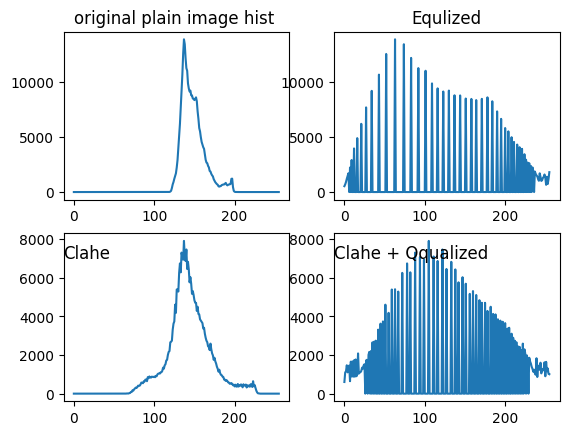

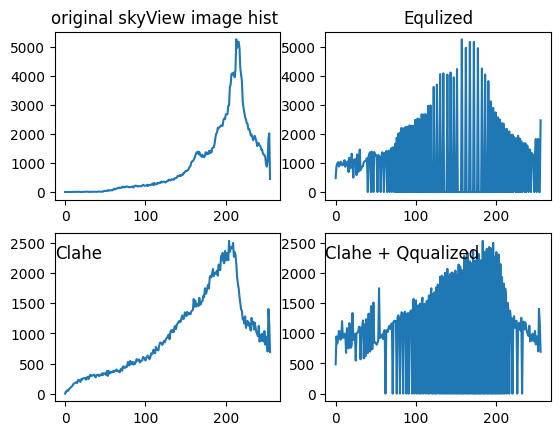

In [57]:

plain_lowcontrast   = cv2.imread("inputs/3_plain.jpg" , cv2.IMREAD_GRAYSCALE)
skyView_lowcontrast = cv2.imread("inputs/3_skyView.jpg" , cv2.IMREAD_GRAYSCALE)
plain_lowcontrast   = cv2.resize(plain_lowcontrast , (650 ,500))
skyView_lowcontrast = cv2.resize(skyView_lowcontrast , (450 ,550))


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_plain = clahe.apply(plain_lowcontrast)
cv2.imwrite('outputs/clahe_plain.jpg',clahe_plain)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_skyView = clahe.apply(skyView_lowcontrast)
cv2.imwrite('outputs/clahe_skyView.jpg',clahe_skyView)


plain_equalized = cv2.equalizeHist(plain_lowcontrast)
skyView_equalized = cv2.equalizeHist(skyView_lowcontrast)
cv2.imwrite("outputs/plain_equalized.jpg" , plain_equalized )
cv2.imwrite("outputs/skyView_equalized.jpg" , skyView_equalized)

plain_clahe_equalized = cv2.equalizeHist(clahe_plain)
skyView_clahe_equalized = cv2.equalizeHist(clahe_skyView)
cv2.imwrite("outputs/plain_clahe_equalized.jpg" , plain_clahe_equalized)
cv2.imwrite("outputs/skyView_clahe_equalized.jpg" , skyView_clahe_equalized)



plain_hist_low_contrast  = cv2.calcHist([plain_lowcontrast]   , [0] , None , [256] , [0 ,256])
plain_hist_equalization = cv2.calcHist([plain_equalized]  , [0] , None , [256] , [0 ,256])
plain_hist_clahe               = cv2.calcHist([clahe_plain]   , [0] , None , [256] , [0 ,256])
plain_hist_clahePLUSeq = cv2.calcHist([plain_clahe_equalized]  , [0] , None , [256] , [0 ,256])

skyView_hist_low_contrast = cv2.calcHist([skyView_lowcontrast]  , [0] , None , [256] , [0 ,256])
skyView_hist_equalization = cv2.calcHist([skyView_equalized] , [0] , None , [256] , [0 ,256])
skyView_hist_clahe               = cv2.calcHist([clahe_skyView]   , [0] , None , [256] , [0 ,256])
skyView_hist_clahePLUSeq = cv2.calcHist([skyView_clahe_equalized]  , [0] , None , [256] , [0 ,256])

#original / eq / clahe / clahe+eq 

numpy_horizontal = np.hstack((plain_lowcontrast , plain_equalized  , clahe_plain , plain_clahe_equalized))
plain_org_Eq_clahe_ClahePLUSOrg = np.concatenate((plain_lowcontrast , plain_equalized  , clahe_plain , plain_clahe_equalized ), axis=1)
cv2.imwrite("outputs/result3_plain_org_eql_clahe_clahePLUSeq.jpg" ,plain_org_Eq_clahe_ClahePLUSOrg )

numpy_horizontal = np.hstack((skyView_lowcontrast , skyView_equalized  , clahe_skyView , skyView_clahe_equalized))
skyView_org_Eq_clahe_ClahePLUSOrg = np.concatenate((skyView_lowcontrast , skyView_equalized  ,clahe_skyView,  skyView_clahe_equalized), axis=1)
cv2.imwrite("outputs/result3_skyView_org_eql_clahe_clahePLUSeq.jpg" ,skyView_org_Eq_clahe_ClahePLUSOrg )


# plain before and after histogram equalization
plt.subplot(2,2,1)
plt.plot(plain_hist_low_contrast)
plt.title("original plain image hist ")
plt.subplot(2,2,2)
plt.plot(plain_hist_equalization)
plt.title("Equlized")
plt.subplot(2,2,3)
plt.plot(plain_hist_clahe)
plt.title("Clahe" , loc="left", y=0.8 )
plt.subplot(2,2,4)
plt.plot(plain_hist_clahePLUSeq)
plt.title("Clahe + Qqualized" , loc="left" , y=0.8)
plt.show()


# sky view before and after histogram equalization
plt.subplot(2,2,1)
plt.plot(skyView_hist_low_contrast)
plt.title("original skyView image hist ")
plt.subplot(2,2,2)
plt.plot(skyView_hist_equalization)
plt.title("Equlized")
plt.subplot(2,2,3)
plt.plot(skyView_hist_clahe)
plt.title("Clahe" , loc="left", y=0.8 )
plt.subplot(2,2,4)
plt.plot(skyView_hist_clahePLUSeq)
plt.title("Clahe + Qqualized" , loc="left" , y=0.8)
plt.show()






In [61]:
# part 3 , CLAHE  , room 

room = cv2.imread("inputs/3_room.jpg" , cv2.IMREAD_GRAYSCALE)
cv2.imwrite("outputs/room_gray.jpg" , room )


equalized_room = cv2.equalizeHist(room )
cv2.imwrite("outputs/room_equalized.jpg" , equalized_room )

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_room = clahe.apply(room)
cv2.imwrite('outputs/room_clahe.jpg',clahe_room)

clahe_equalized_room = cv2.equalizeHist(clahe_room )
cv2.imwrite("outputs/clahe_equalized_room.jpg" , clahe_equalized_room )


numpy_horizontal = np.hstack((room , equalized_room  , clahe_room ))
ROOM_org_Eq_clahe = np.concatenate((room , equalized_room  , clahe_room), axis=1)
cv2.imwrite("outputs/result3_ROOM_org_eql_clahe_.jpg" , ROOM_org_Eq_clahe )



True